In [8]:
#plotting the linear fit and log normal fit on top of each other
import numpy as np
import yt
import time
from yt.funcs import mylog
import matplotlib.pyplot as plt
mylog.setLevel(40) #prevents warning
plt.style.use('default')
import scipy
from scipy import optimize
from pdf_fitter import *

In [9]:
#only cell in need of changing between runs
inputfile = ('/scratch/jak491/npz_storage/covering_grid_den0.npz','/scratch/jak491/npz_storage/covering_grid_den1.npz','/scratch/jak491/npz_storage/covering_grid_den2.npz', '/scratch/jak491/npz_storage/covering_grid_den3.npz', '/scratch/jak491/npz_storage/covering_grid_den4.npz', '/scratch/jak491/npz_storage/covering_grid_den5.npz', '/scratch/jak491/npz_storage/covering_grid_den_high.npz')
percent = 3
perc = '3'
titles = ('Gravity ','Turbulence', 'Magnetic Fields', 'All + Outflows')
#titles = ('10% SFE\nG','10% SFE\nG+T','10% SFE\nG+T+M','6% SFE\nG+T+M+P' )
sigma_limit = .75
slope_limit = 1

In [10]:
#define Linear function
def linear(x, m, b): 
    return m*x + b
    
#define Log Normal function
def lognorm(x,mu,sigma):
   return np.log((1/(np.sqrt(2*np.pi*sigma**2)))*(np.exp(-((x-mu)**2)/(2*sigma**2))))
 

In [11]:
#plot setup
d = {}
variable_name =('density_g','density_gt','density_gtm', 'density_gtmp')
input_file = inputfile[percent]
plot_data = np.load(input_file, allow_pickle=True)

starting
0
[-0.25250613  0.49331047]
[-0.14528982  0.44009252]
[-0.22340586  0.59290019]
1
[-0.41890673  0.64768763]
[-0.18696722  0.70290015]
[-0.3157786   0.78818252]
2
[-0.22711572  0.5167685 ]
[-0.31314816  0.55984984]
[-0.23401252  0.65360734]
3
[-0.20114736  0.51394325]
[-0.1794255   0.43934636]
[-0.12328404  0.648576  ]


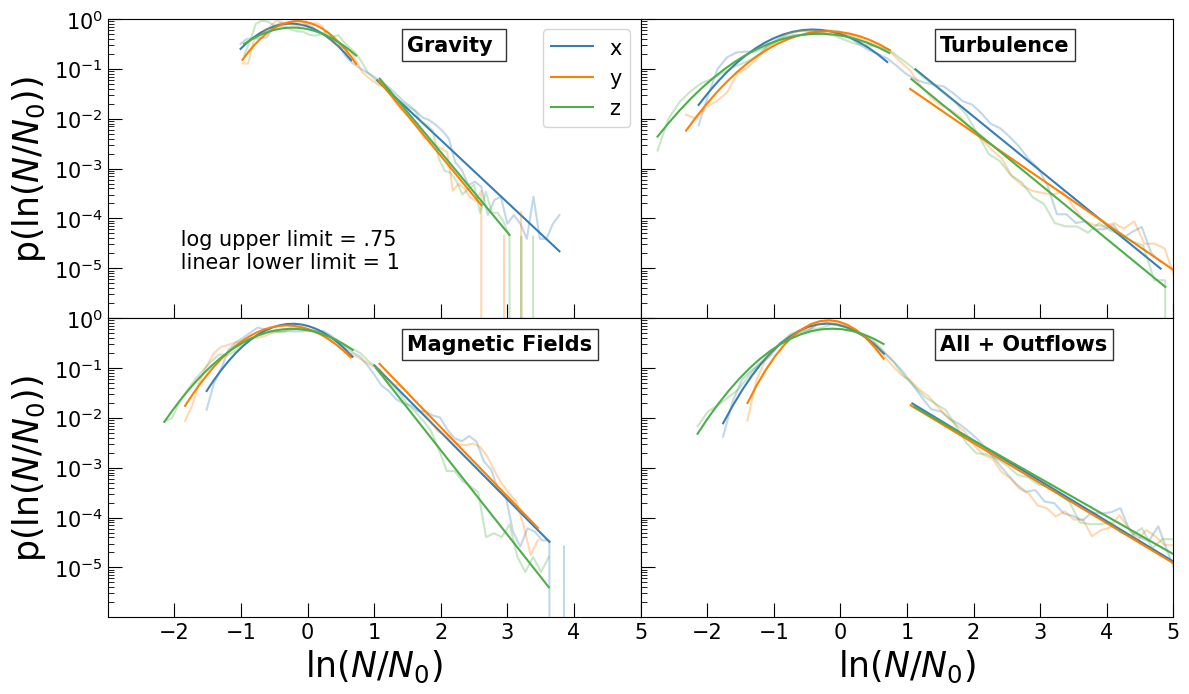

time: 0.958157229423523


In [12]:
#main processing cell. 
start = time.time()
print('starting')
slopes = []
error = []
sigma = []
sigma_error = []
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12,8), sharex = 'all', sharey = 'row', gridspec_kw={'hspace': 0,'wspace':0})

ax =ax.ravel()
#plt.suptitle('Column Densities with ' + perc + '% SFE', size =26)
ax[0].annotate(' log upper limit = .75\n linear lower limit = 1',[-2,1e-5], size =15)

ax[0].plot(100,100, color = '#377eb8', alpha =1)
ax[0].plot(100,100, color = '#ff7f00', alpha =1)
ax[0].plot(100,100, color = '#4daf4a', alpha =1)
ax[0].legend([ 'x', 'y', 'z'], fontsize = 15)
b = 0

for n in range(4):
    den = plot_data[plot_data.files[n]]
    color_list = ('#377eb8', '#ff7f00', '#4daf4a')
    print(n)     #for time keeping
    
    for a in (range(3)):

        log_den_d = plot_data[plot_data.files[4+b]]
        counts_d, binS_d = np.histogram(log_den_d,bins=50, density= True)
        b = b+1
        
        bin_list = []
        for i in range(len(binS_d)-1):
            bin_i=(binS_d[i]+binS_d[i+1])/2
            bin_list.append(bin_i)
        #create subrange and plots linear fit
        x =[]
        y = []
        x_log =[]
        y_log = []
        for i in range(len(bin_list)):
            if bin_list[i] > slope_limit:
                if counts_d[i] > 0:
                        x.append(bin_list[i])
                        y.append(counts_d[i])
                else:
                    break
        for i in range(len(bin_list)):
            if bin_list[i] < sigma_limit:
                    x_log.append(bin_list[i])
                    y_log.append(counts_d[i])
            else:
                break
        
        lin_param, lin_con = scipy.optimize.curve_fit(linear, x, np.log(y))
        y = linear(np.array(x),lin_param[0],lin_param[1])
        
        log_param, log_con = scipy.optimize.curve_fit(lognorm, x_log, np.log(y_log))
        y_log = lognorm(np.array(x_log),log_param[0],log_param[1])
        
        #print( lin_param)
        print(log_param)
        
        slopes.append(lin_param[0])
        error.append(np.sqrt(np.diag(lin_con))[0])
        sigma.append(log_param[1])
        sigma_error.append(np.sqrt(np.diag(log_con))[1])
        ax[n].plot(bin_list, counts_d, color = color_list[a], alpha = .3)
        ax[n].plot(x,np.exp(y), color = color_list[a])
        ax[n].plot(x_log,np.exp(y_log), color = color_list[a])

        
    if n > 1:
        ax[n].set_xlabel(r'ln($N/N_0$)', size=25)
    if n == 0 or n == 2:
        ax[n].set_ylabel(r'p(ln($N/N_0$))', size=25)
    
    ax[n].annotate(titles[n], (1.5,.3), color = 'black', fontsize =15, weight = 'bold',horizontalalignment='left',verticalalignment='center', textcoords='data', bbox=dict(facecolor='white', alpha=0.8))
    ax[n].tick_params(direction='in', which = 'major', size =10)
    ax[n].tick_params(direction='in', which = 'minor', size =4)
    #ax[n].set_title(titles[n], size = 17)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**(-6),1)
    ax[n].set_xlim(-3,5)
    ax[n].tick_params(direction='in', length=10, labelsize = 15, which = 'major')

    ax[n].set_yticks((1e0,1e-1,1e-2,1e-3,1e-4,1e-5))
    ax[n].set_xticks((-2,-1,0,1,2,3,4,5))
plt.tight_layout()
plt.subplots_adjust(top=.85)
plt.savefig('combined_column_lim,75_4lv_'+perc+'%.pdf', bbox_inches='tight', format = 'pdf')
plt.show()

file = open("comb_slope_" +perc+"%.txt", "w")
str_dictionary = repr(slopes)
file.write(str_dictionary + "\n")
str_dictionary = repr(error)
file.write(str_dictionary + "\n")
file.close()


#write sigma and error to txt file for later
file = open("txt_file_storage/sigma_" +perc+"%.txt", "w")
str_dictionary = repr(sigma)
file.write(str_dictionary + "\n")
str_dictionary = repr(sigma_error)
file.write(str_dictionary + "\n")
file.close()

end = time.time()
print("time:",(end-start)/60)

In [32]:
help(PLPLFit)

Help on function PLPLFit in module pdf_fitter:

PLPLFit(xdata, ydata, p0, params, use_K21=True, print_result=True)
    This function will return the fitted parameters directly. 
    Params: 
    xdata - the x values of the data
    ydata - the y values of the data
    p0 - the initial guess for fitting
    print_result - Set to True by default. To remove the output on the screen, add print_result=False to function call.



In [8]:
help(PLPLFit)

Help on function PLPLFit in module pdf_fitter:

PLPLFit(xdata, ydata, p0, params, use_K21=True, print_result=True)
    This function will return the fitted parameters directly. 
    Params: 
    xdata - the x values of the data
    ydata - the y values of the data
    p0 - the initial guess for fitting
    print_result - Set to True by default. To remove the output on the screen, add print_result=False to function call.



In [5]:
from pdf_fitter import *
import numpy as np


sample_data = np.load('./sample_data.npz')

#xdata and ydata are just two arrays. 
xdata = sample_data['arr_0']
ydata = sample_data['arr_1']
sink = float(sample_data['arr_2']) #x cut off

params = Params(s_cut_off = sink)

p0 = [1.7, 1.6, 0.8, 7.1]
PLPLresult = PLPLFit(xdata, ydata, p0, params, use_K21=True)

p0 = [1.00, 1.57]
PLresult = PLFit(xdata, ydata, p0, params)

print (PLresult.sigma_err, PLresult.alpha_g_err)#, PLPLresult.sigma_err, PLPLresult.sd)
#To know more about how to access the result: help(Result)

Bootstrapping starts now ...
Bootstrapping results -  -1.527666260362821 -1.528212913848738 0.009043239688445299
//============Fit complete=========//
Best fit parameters: 
 sigma= 1.7254479484219478 +/- 0.004775043615816153 
 alpha= 1.763674883388621 +/- 0.02133096358958932 
 alpha1= 1.2165928249378521 +/- 0.046581830418041266 
 sb= 7.142666655737802 +/- 0.22719188051412093
s0, st =  -1.527666260362821 3.723094790479455
After bootstrapping: s0, st= -1.528212913848738 +/- 0.009043239688445299 3.722548136993538 +/- 0.395870160501289
//============Fit complete=========//
Best fit parameters: 
 sigma= 1.7259568606908882 +/- 0.0067001057153255605 
 alpha= 1.6401640672571394 +/- 0.00842118278374646 
 s0= -1.4883236736546344 +/- 0.010903499357370047 
 st= 3.3976054900855654 +/- 0.43138282044217446
0.0067001057153255605 0.00842118278374646


In [23]:
print('p0= (sigma, alpha, alpha1, sb)')
PLresult.sigma
help(Params)

p0= (sigma, alpha, alpha1, sb)
Help on class Params in module pdf_fitter:

class Params(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, root_finding_lower_lim=-15, root_finding_upper_lim=1, root_finding_step_size=0.2, root_finding_max_tries=40, s_cut_off=10, y_min_cut_off=0, bounds=[(0, 1.01, 0.3, 3), (5, 5, 5, 10)], shrink_data=4, debug=False, single_bounds=[(1, 1), (5, 5)])
 |      Parameters: 
 |      root_finding_lower_lim - This is the lower limit for the root finding range.
 |      root_finding_upper_lim - This is the upper limit for the root finding range.
 |      root_finding_step_size - This is the step_size for root finding. Range shrinks by this value after each iteration.
 |      root_finding_max_tries - This is the maximum number of attempts to make at root_finding.
 |      s_cut_off - The maximum cut-off for the x values.
 |      y_min_cut_off - The minimum cut-off for the y-values.
 |      bounds - The bounds of the parameters (double PL case).
 |     

In [7]:
log_param

array([-0.23756778,  0.66047905])